In [168]:
import pandas as pd
import pytz, datetime
import pytz
from pytz import timezone
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [169]:
path='datos2021/'
filenamePy=path+'flux.json'


In [170]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py.set_index(['datetime'],drop=True, inplace=True)
py= py.iloc[1:]
#py.tail()

In [171]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py['datetime'] = py['datetime'].dt.tz_convert('America/Sao_Paulo')
py.set_index(['datetime'],drop=True, inplace=True)
#py.tail()

In [172]:
py=py.resample('H').sum()

In [173]:
py['conteo']=py['conteo'].values/0.0512
py['canal_a']=py['canal_a'].values/1.364
py['canal_b']=py['canal_b'].values/0.0512
py['ratio']=py['canal_a'].values - py['conteo'].values


In [174]:
py.tail()

,eficiencia,coincidencia,conteo,canal_a,canal_b,hora,ratio
datetime,,,,,,,
2021-04-07 08:00:00-03:00,28.472005,3.625000,8496.09375,11217.741935,9355.46875,4.853385e+10,2721.648185
2021-04-07 09:00:00-03:00,27.822508,3.266667,7656.25000,11392.228739,8535.15625,4.853396e+10,3735.978739
2021-04-07 10:00:00-03:00,27.785046,3.833333,8984.37500,11483.137830,9648.43750,4.853406e+10,2498.762830
2021-04-07 11:00:00-03:00,27.514490,3.550000,8320.31250,11470.674487,9101.56250,4.853417e+10,3150.361987
2021-04-07 12:00:00-03:00,18.909243,2.508333,5878.90625,7659.090909,6347.65625,3.235617e+10,1780.184659


In [175]:
flagPy1=np.logical_and(py.index>"2021-04-01",py.index<"2021-04-08")
flagPy2=np.logical_and(py.index>"2021-03-18",py.index<"2021-04-08")

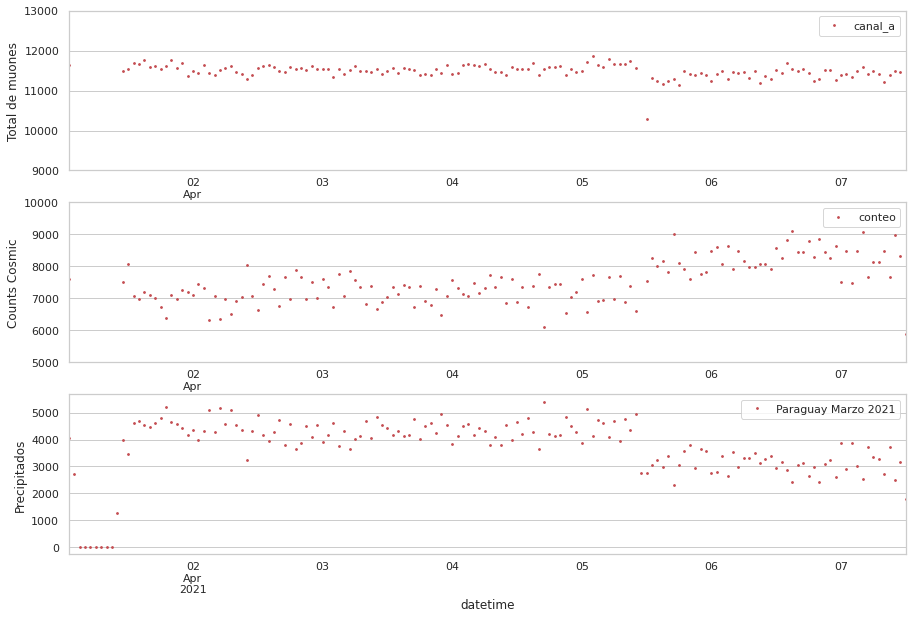

In [176]:
fig, axes = plt.subplots(3,1, figsize=(15,10), sharex=True)
plt.subplot(311)

axes =py['canal_a'][flagPy1].plot(marker='.',markersize=3.5, linestyle='None',legend=True, alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Total de muones')
ax.set_ylim(9000, 13000)

plt.subplot(312)
axes =py['conteo'][flagPy1].plot(marker='.',markersize=3.5, linestyle='None',legend=True,  alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylim(5000, 10000)
ax.set_ylabel('Counts Cosmic')

plt.subplot(313)
axes =py['ratio'][flagPy1].plot(marker='.',markersize=3.5, linestyle='None',legend=True,  label='Paraguay Marzo 2021',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Precipitados')

#plt.subplot(313)
#axes =mex['Coincidencias'][flagMex].plot(marker='.',markersize=2.5,linestyle='None', label='México Marzo 2020',alpha=1,color='b', subplots=True)
#ax = plt.gca()
#ax.set_ylabel('Counts')
#ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.savefig('EscaramujovsParaguay.png')

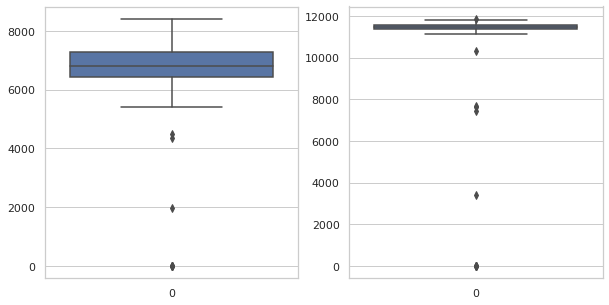

In [154]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True)
plt.subplot(121)
sns.set(style="whitegrid")
ax = sns.boxplot(data=py['conteo'][flagPy1])
plt.subplot(122)
sns.set(style="whitegrid")
ax = sns.boxplot(data=py['canal_a'][flagPy1])
plt.savefig("boxplot.png", bbox_inches='tight')